In [1]:
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy.signal import periodogram, welch


In [2]:
noise1_file = "noise1.wav"
noise2_file = "noise2.wav"
noise3_file = "noise3.wav"

# load data from wave file
fs, noise1 = wavfile.read(noise1_file)
fs, noise2 = wavfile.read(noise2_file)
fs, noise3 = wavfile.read(noise3_file)
print(fs, noise1)
print(fs, noise2)
print(fs, noise3)

16000 [ -9504    222   3685 ...  -7331   7429 -15640]
16000 [ -4923  -6832 -11327 ...  -4189  -4004  -9798]
16000 [ -9943  -4345  -4866 ...  -7928   2598 -17481]


In [3]:
def plot_psd(f, Pxx_den):
    plt.plot(f, Pxx_den)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

Periodigram
Le premier bruit a un spectre plat ce qui est caracteristique d'un bruit blanc.
Le second bruit a un spectre qui descent linéairement en echelle logarytmique ce qui est caracteristique d'un bruit rose.
Le troisieme bruit ressemble a un bruit rose mais c'est difficile a dire avec le periodigramme.

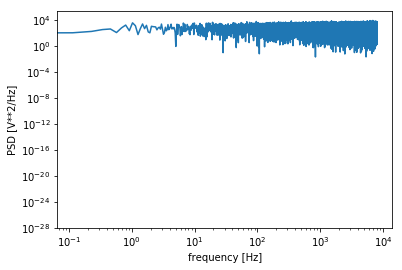

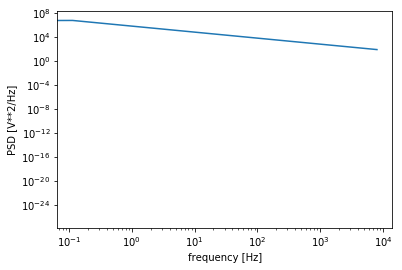

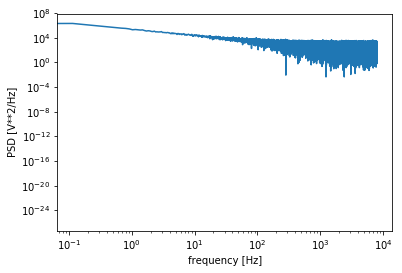

In [4]:
# Periodigram
f1, Pxx_den1 = periodogram(noise1, fs, scaling='spectrum')
plot_psd(f1, Pxx_den1)

f2, Pxx_den2 = periodogram(noise2, fs, scaling='spectrum')
plot_psd(f2, Pxx_den2)

f3, Pxx_den3 = periodogram(noise3, fs, scaling='spectrum')
plot_psd(f3, Pxx_den3)

Welch
Le premier bruit a un spectre plat ce qui est caracteristique d'un bruit blanc.
Le second bruit a un spectre qui descent linéairement en echelle logarytmique ce qui est caracteristique d'un bruit rose.
Le troisieme bruit resemble a une combinaison de bruit blanc (variation de PSD dans les haute frequence) et de bruit rose (pente descendante).

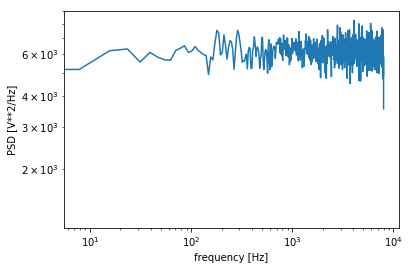

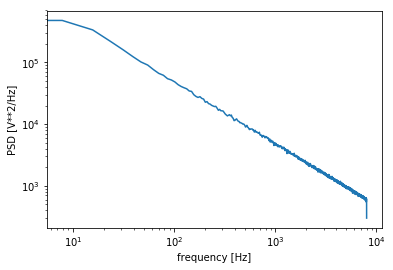

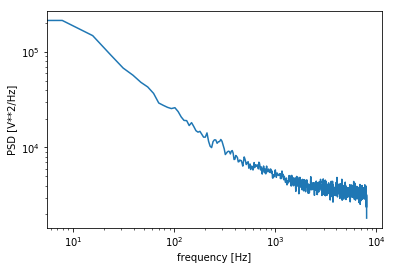

In [5]:
# Welch
# nperseg size of split
f1, Pxx_den1 = welch(noise1, fs, nperseg=2048)
plot_psd(f1, Pxx_den1)

f2, Pxx_den2 = welch(noise2, fs, nperseg=2048)
plot_psd(f2, Pxx_den2)

f3, Pxx_den3 = welch(noise3, fs, nperseg=2048)
plot_psd(f3, Pxx_den3)

Baraba image

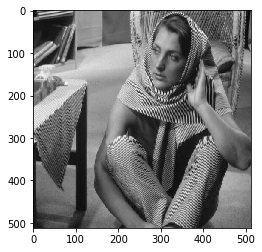

[[ 32.96  35.02  35.02 ...  30.9   62.83 108.15]
 [ 32.96  33.99  33.99 ...  32.96  64.89 110.21]
 [ 30.9   32.96  32.96 ...  36.05  67.98 113.3 ]
 ...
 [ 44.29  44.29  42.23 ... 107.12 107.12 107.12]
 [ 44.29  44.29  43.26 ... 112.27 110.21 108.15]
 [ 44.29  44.29  43.26 ... 117.42 113.3  108.15]]
(512, 512)


In [6]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

# Open barbara image
img = Image.open("barbara.jpg")
img_png = mpimg.imread("barbara.jpg")
img_gray = rgb2gray(img_png)

# plot image
fig = plt.figure()
plt.gray()  
plt.imshow(img_gray)
plt.show() 
print(img_gray)
print(img_gray.shape)

Generate noise for SNR (0dB, 5 dB, 10 dB, 15 dB, 20 dB)
SNR = 20 log (||x||/||x-y||)

In [15]:
def get_sigma(img, snr):
    # first modify image to vector
    img_vector = np.ndarray.flatten(img)
    #print(img_vector.min(), img_vector.max())
    #print(img_vector.shape)
    signal = np.linalg.norm(img, 'fro')
    #print("signal = ", signal)
    bruit = signal*10**(-1*snr/20)
    print("bruit = ", bruit)
    sigma = np.sqrt(bruit)
    #print("sigma =", sigma)
    #sigma = sigma/(img_vector.shape)
    return sigma

sigma_0 = get_sigma(img_gray, 0)
print(sigma_0)
sigma_5 = get_sigma(img_gray, 5)
print(sigma_5)
sigma_10 = get_sigma(img_gray, 10)
print(sigma_10)
sigma_15 = get_sigma(img_gray, 15)
print(sigma_15)
sigma_20 = get_sigma(img_gray, 20)
print(sigma_20)


bruit =  63867.87223671694
252.72093747198102
bruit =  35915.54391068331
189.5139675873082
bruit =  20196.794557665824
142.11542688134116
bruit =  11357.492216155031
106.57153567512778
bruit =  6386.787223671694
79.91737748244554


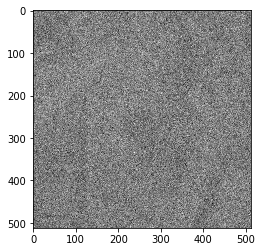

In [10]:
#from scipy.stats import signaltonoise

def get_noise(sigma, shape):
    gaussian = sigma*np.random.randn(shape[0],shape[1])
    
    return gaussian

noise = get_noise(sigma_0, img_gray.shape) 
noise_img = img_gray + noise

#snr = scipy.stats.signaltonoise(noise_img, axis=None)
#print("snr ", snr)

fig = plt.figure()
plt.gray()  
plt.imshow(noise_img)
plt.show() 


/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:966: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:966: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


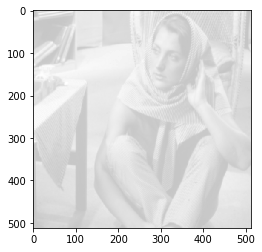

In [16]:
# Apply wiener filter
from scipy.signal import wiener


img_filtered = wiener(noise_img)

fig = plt.figure()
plt.gray()  
plt.imshow(img_filtered)
plt.show() 


In [ ]:
# note de music

fs, data = wavfile.read("string1.wav")
data = 0.1 * np.random.normal(row,col)





In [ ]:

def SNR(sig, noise,dt):
    Signal = np.sum(np.abs(np.fft.fft(img_vector)*dt)**2)/len(np.fft.fft(img_vector))
    Noise = np.sum(np.abs(np.fft.fft(noise)*dt)**2)/len(np.fft.fft(noise))
    return (10 * np.log10(Signal/Noise))


def Gauss_noise(k,sig):
     return np.random.normal(scale=k*np.max(sig), size=len(sig))

def noisy_sig(sig,k, dt):
    return np.fft.ifft(np.fft.fft(sig)*dt+np.fft.fft(np.random.normal(scale= k*np.max(sig), size=len(sig)))*dt)/dt   

